# Apply classification to runoffs to estimate contribution

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import csv
import matplotlib
import pickle

%matplotlib notebook

In [5]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

Load ANHA12 runoff file:

In [6]:
month=7

In [8]:
c = nc.Dataset('/ocean/brogalla/GEOTRACES/data/runoff/'+ \
               'ANHA12_runoff_monthly_combined_Dai_Trenberth_Bamber_y2002.nc','r')
lon_rf  = np.array(c.variables['nav_lon'])
lat_rf  = np.array(c.variables['nav_lat'])
socoefr = np.array(c.variables['socoefr'])
rf = np.array(c.variables['runoff'][month])

In [11]:
print(np.amax(socoefr))

0.5


In [11]:
rf = np.array(rf)
lon_rf = np.array(lon_rf)
lat_rf = np.array(lat_rf)
rf[rf == 0] = np.nan
lon_rf[rf == 0.0] = np.nan
lat_rf[rf == 0.0] = np.nan

In [12]:
rf.shape

(2400, 1632)

In [15]:
print(np.nanmax(rf[1480:2180,160:800]))
print(np.nanmean(rf[1480:2180,160:800]))

0.055798575
0.001385977


Load concentration classification:

In [62]:
classif    = nc.Dataset('/ocean/brogalla/GEOTRACES/data/rivers/river_input-glacier-enhanced.nc','r')
dmn_rivers = classif.variables['dmn_rivers']

In [63]:
combined         = np.multiply(dmn_rivers, rf)*(1/1000.0) # mol/L * m3/s
combined_monthly = combined*(3600*24*31)*1e9/0.49/(1000.0) # nmol/L * kg m3 = nM m3/dz/1000 

<IPython.core.display.Javascript object>


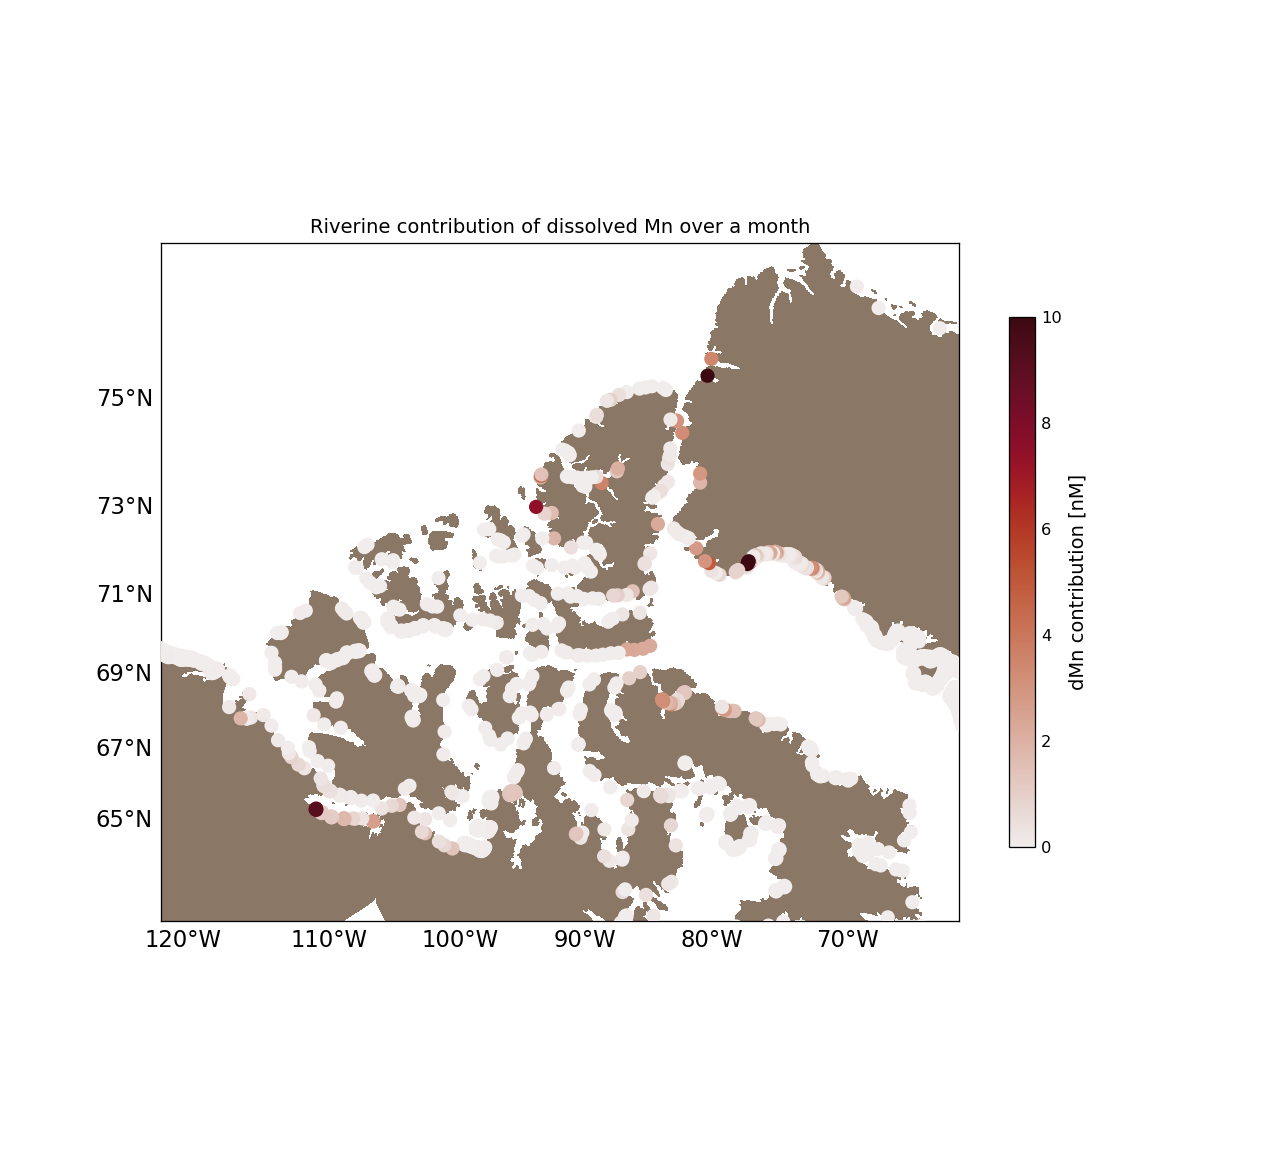

/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [67]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x_rf, y_rf = proj(lon_rf, lat_rf)

# clevels=[0, 2, 4, 6, 8, 10, 12, 14, 16]
CS = proj.scatter(x_rf[combined_monthly>0], y_rf[combined_monthly>0], \
                  c=combined_monthly[combined_monthly>0], vmax=10, s=60, cmap=cmocean.cm.amp, zorder=3)
CBar = plt.colorbar(CS, shrink=0.6)
CBar.set_label('dMn contribution [nM]', fontsize=12)
CBar.ax.tick_params(axis='y', length=0)
plt.title('Riverine contribution of dissolved Mn over a month');